In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
# Read data - diamonds.csv
diamonds_df = pd.read_csv('D:/BITS-PILANI/Semester2/ML/Assignment/diamonds.csv')
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [239]:
#Data Exploration -1
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [240]:
#Data Exploration -2
diamonds_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [241]:
# Drop attribute Unnamed:0
diamonds_df.drop( diamonds_df.filter(regex='Unnamed'), axis = 1, inplace = True)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [242]:
#Identify Columns with missing values
diamonds_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [243]:
diamonds_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [244]:
diamonds_df.carat.value_counts().sum()

53940

In [245]:
#The minimum values of x(height in mm), y(width in mm), z(depth in mm) are 0 
# This is not possible, hence removing those data
diamonds_df = diamonds_df[(diamonds_df['x'] > 0) 
                          & (diamonds_df['y'] > 0) 
                          & (diamonds_df['z'] > 0)].reset_index(drop=True)
print(len(diamonds_df))

53920


In [246]:
#Data Analysis for attribute "carat"
diamonds_df['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2240
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64

In [247]:
diamonds_df['carat'].describe()

count    53920.000000
mean         0.797698
std          0.473795
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

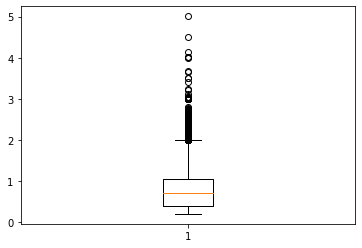

In [248]:
plt.ion()
plt.boxplot(diamonds_df['carat'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF059F6888>]],
      dtype=object)

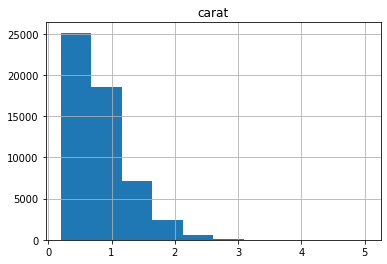

In [249]:
diamonds_df.hist(column='carat')

In [250]:
#Data Analysis for attribute "cut"
diamonds_df['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [251]:
#Data Analysis for attribute "color"
diamonds_df['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [252]:
#Data Analysis for attribute "clarity"
diamonds_df['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [253]:
#Data Analysis for attribute "depth"
diamonds_df['depth'].value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2038
62.1    2019
        ... 
72.9       1
52.7       1
69.1       1
70.5       1
69.4       1
Name: depth, Length: 184, dtype: int64

In [254]:
diamonds_df['depth'].describe()

count    53920.000000
mean        61.749514
std          1.432331
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

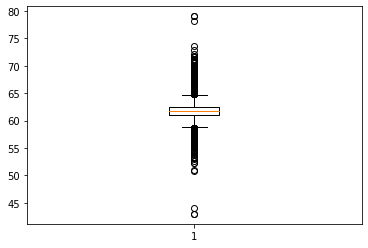

In [255]:
plt.ion()
plt.boxplot(diamonds_df['depth'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF0CD2FE08>]],
      dtype=object)

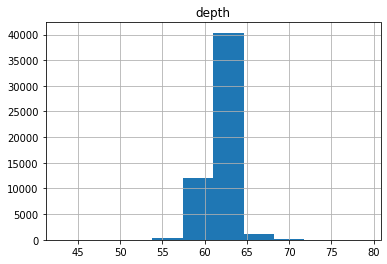

In [256]:
diamonds_df.hist(column='depth')

In [257]:
#Data Analysis for attribute "table"
diamonds_df['table'].value_counts()

56.0    9879
57.0    9724
58.0    8366
59.0    6565
55.0    6268
        ... 
61.3       1
61.6       1
64.3       1
61.8       1
63.3       1
Name: table, Length: 127, dtype: int64

In [258]:
diamonds_df['table'].describe()

count    53920.000000
mean        57.456834
std          2.234064
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

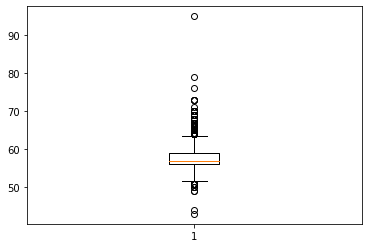

In [259]:
plt.ion()
plt.boxplot(diamonds_df['table'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF0F8431C8>]],
      dtype=object)

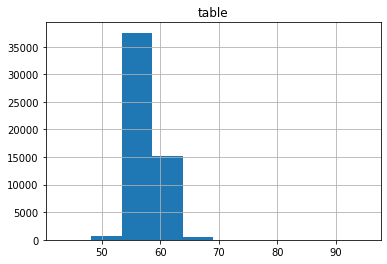

In [260]:
diamonds_df.hist(column='table')

In [261]:
#Data Analysis for attribute "price"
diamonds_df['price'].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
3962       1
14205      1
13550      1
4762       1
11600      1
Name: price, Length: 11597, dtype: int64

In [262]:
diamonds_df['price'].describe()

count    53920.000000
mean      3930.993231
std       3987.280446
min        326.000000
25%        949.000000
50%       2401.000000
75%       5323.250000
max      18823.000000
Name: price, dtype: float64

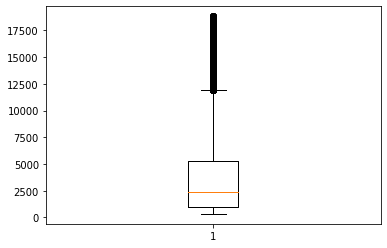

In [263]:
plt.ion()
plt.boxplot(diamonds_df['price'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF109A1B08>]],
      dtype=object)

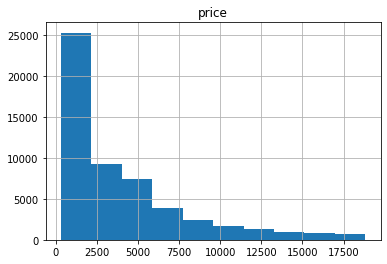

In [264]:
diamonds_df.hist(column='price')

In [265]:
#Data Analysis for attribute "x"
diamonds_df['x'].value_counts()

4.37    448
4.34    437
4.33    429
4.38    428
4.32    425
       ... 
9.54      1
9.53      1
3.76      1
9.23      1
9.35      1
Name: x, Length: 553, dtype: int64

In [266]:
diamonds_df['x'].describe()

count    53920.000000
mean         5.731627
std          1.119423
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

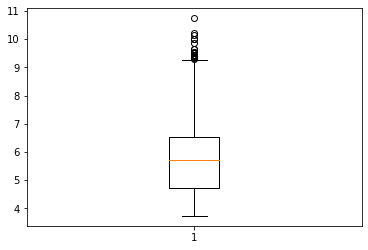

In [267]:
plt.ion()
plt.boxplot(diamonds_df['x'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF23FDEA08>]],
      dtype=object)

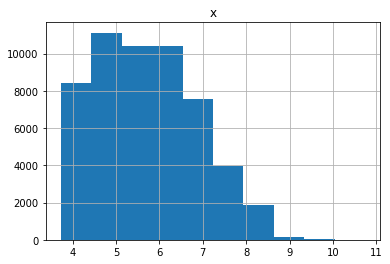

In [268]:
diamonds_df.hist(column='x')

In [269]:
#Data Analysis for attribute "y"
diamonds_df['y'].value_counts()

4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
        ... 
58.90      1
9.20       1
9.26       1
9.03       1
3.75       1
Name: y, Length: 550, dtype: int64

In [270]:
diamonds_df['y'].describe()

count    53920.000000
mean         5.734887
std          1.140126
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

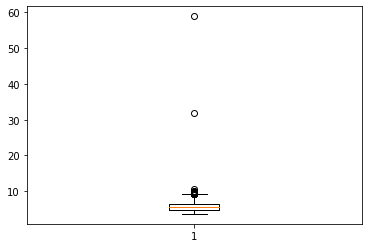

In [271]:
plt.ion()
plt.boxplot(diamonds_df['y'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF23FE66C8>]],
      dtype=object)

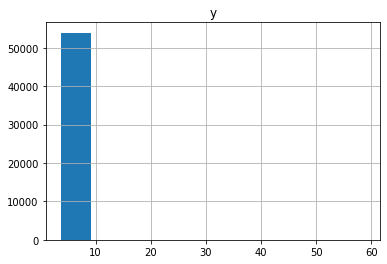

In [272]:
diamonds_df.hist(column='y')

In [273]:
#Data Analysis for attribute "z"
diamonds_df['z'].value_counts()

2.70     767
2.69     748
2.71     738
2.68     730
2.72     697
        ... 
5.65       1
5.86       1
5.72       1
2.26       1
31.80      1
Name: z, Length: 374, dtype: int64

In [274]:
diamonds_df['z'].describe()

count    53920.000000
mean         3.540046
std          0.702530
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

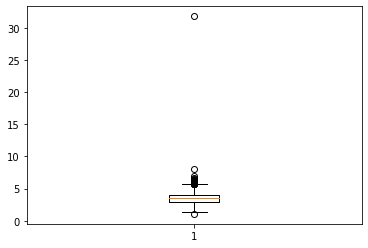

In [275]:
plt.ion()
plt.boxplot(diamonds_df['z'])
plt.pause(0.05)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF24068248>]],
      dtype=object)

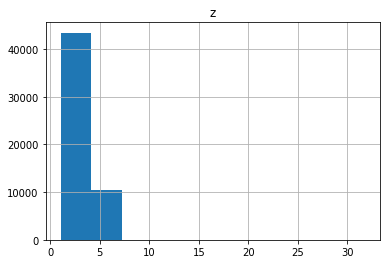

In [285]:
diamonds_df.hist(column='z')

In [286]:
#Extract all columns except the last one in X
X = diamonds_df.iloc[:,:-1]
X.head(6)

,carat,cut,color,clarity,depth,table,price,x,y
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96


In [287]:
X = pd.get_dummies(data = X, columns = ['cut','color','clarity'])
X.head()

,carat,depth,table,price,x,y,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [293]:
#Extract last column in Y
#Y = diamonds_df.iloc[:,-1:]
Y = diamonds_df["z"]
Y.head(6)

0    2.43
1    2.31
2    2.31
3    2.63
4    2.75
5    2.48
Name: z, dtype: float64

In [295]:
#Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

In [296]:
#Import module to split the dataset
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [297]:
#train the model
#logreg.fit(X_train, Y_train)